In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import warnings 
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [4]:
df=pd.read_csv("insurance.csv")

In [5]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [6]:
df.shape

(1338, 7)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df1=df.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
df.isnull().sum()*100/len(df)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

<Figure size 432x288 with 0 Axes>

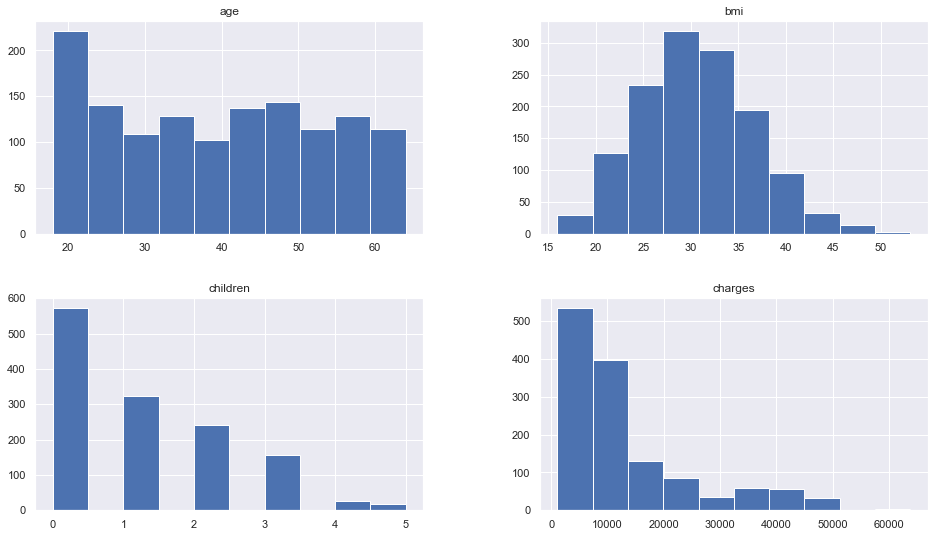

In [16]:
plt.figure()
df.hist(figsize=(16,9));

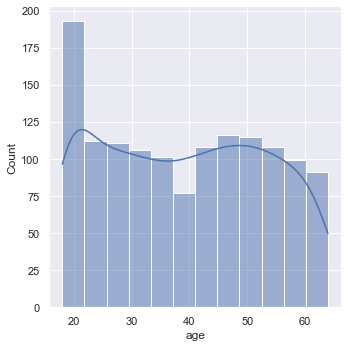

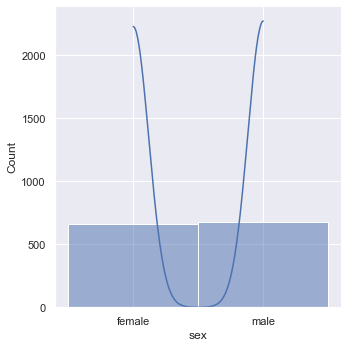

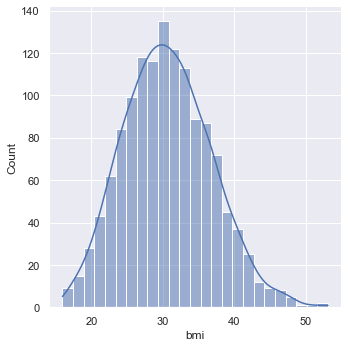

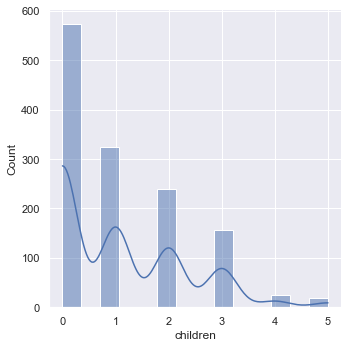

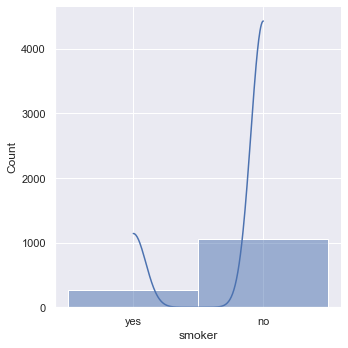

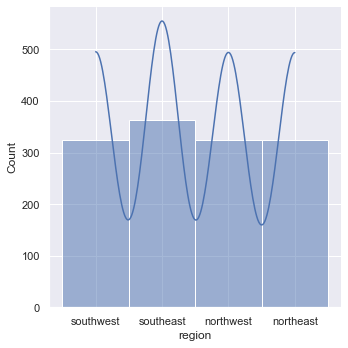

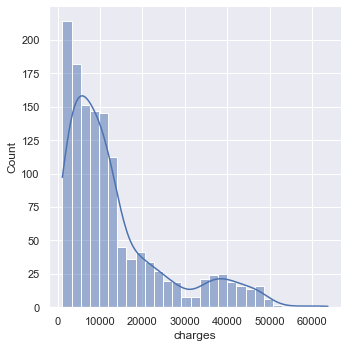

In [17]:
for col in df.columns:
    sns.displot(df[col],kde=True)

<AxesSubplot:xlabel='sex', ylabel='count'>

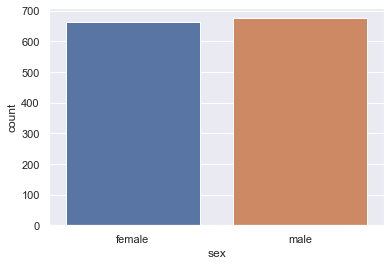

In [18]:
sns.countplot(x='sex',data=df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

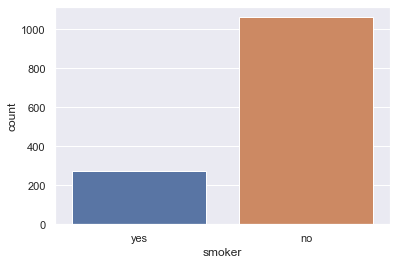

In [19]:
sns.countplot(x='smoker',data=df)

<AxesSubplot:xlabel='region', ylabel='count'>

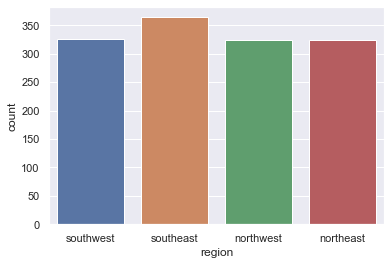

In [20]:
sns.countplot(x='region',data=df)

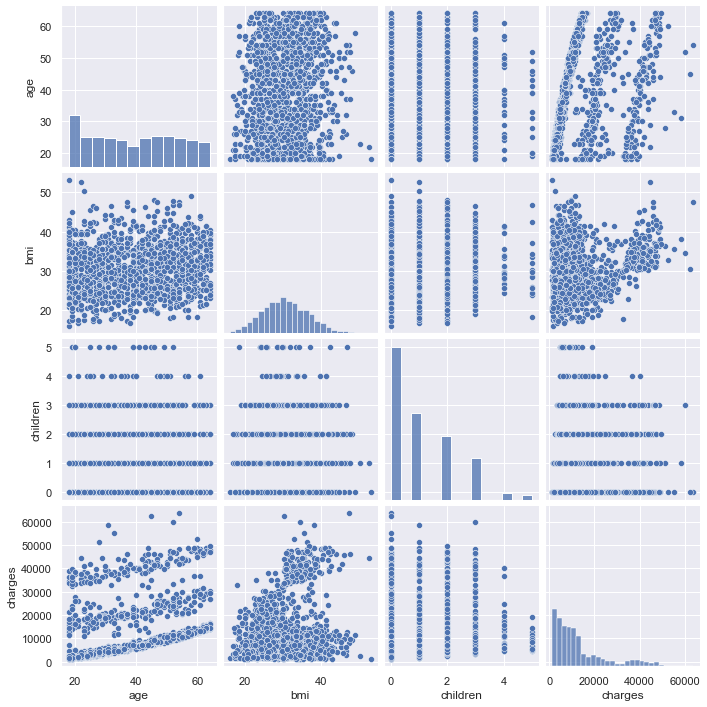

In [21]:
sns.pairplot(data=df);

<AxesSubplot:xlabel='sex', ylabel='charges'>

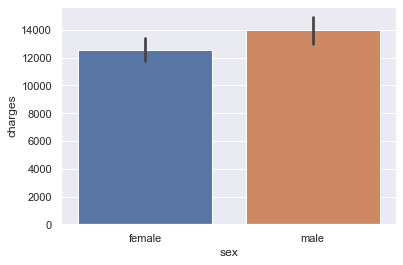

In [22]:
sns.barplot(x='sex',y='charges',data=df)

<AxesSubplot:xlabel='region', ylabel='charges'>

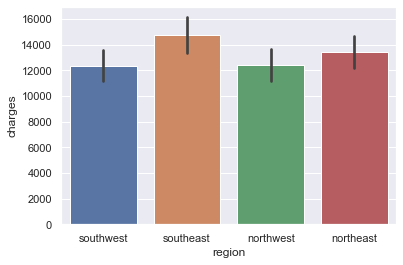

In [23]:
sns.barplot(x='region',y='charges',data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

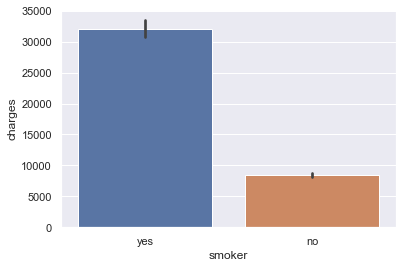

In [24]:
sns.barplot(x='smoker',y='charges',data=df)

<AxesSubplot:xlabel='charges', ylabel='Density'>

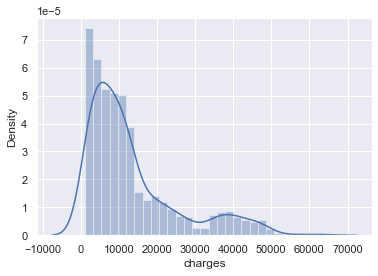

In [25]:
sns.distplot(df['charges'])

<AxesSubplot:>

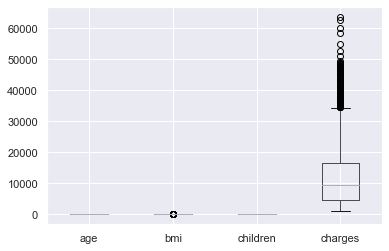

In [27]:
df.boxplot()

In [28]:
df.shape

(1337, 7)

In [30]:
df=pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True)

In [31]:
df.shape

(1337, 9)

In [32]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [36]:
df.iloc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
charges     16884.924
Name: 0, dtype: object

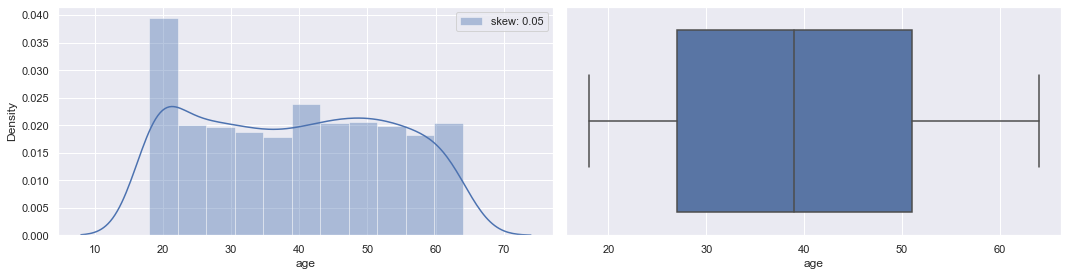

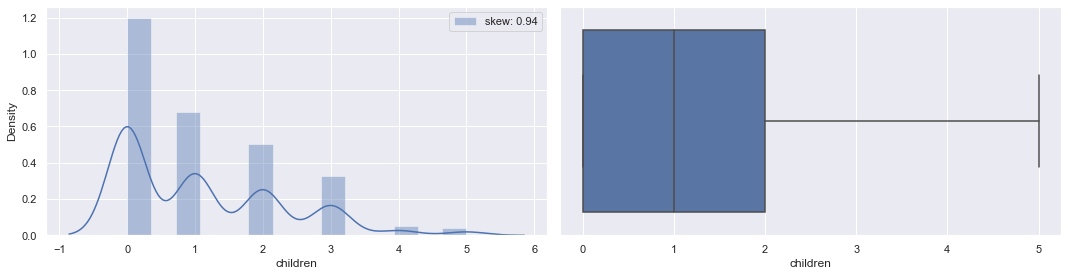

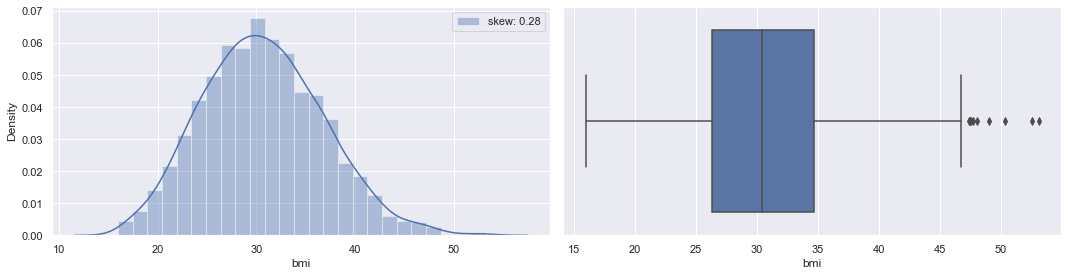

In [37]:
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [39]:
df_cap=df.copy()

In [40]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [41]:
iqr_capping(df_cap, features, 1.5)

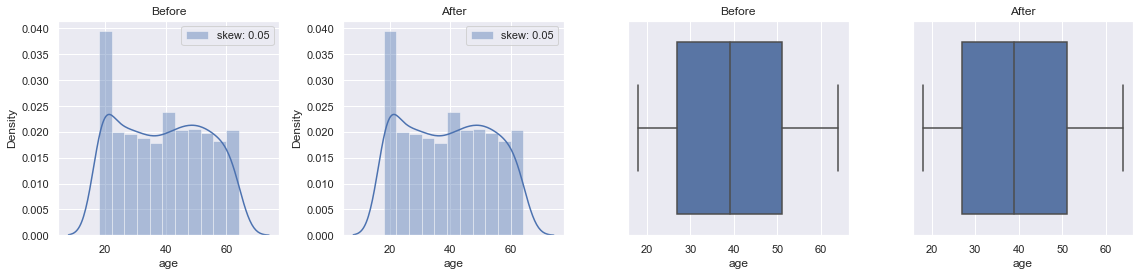

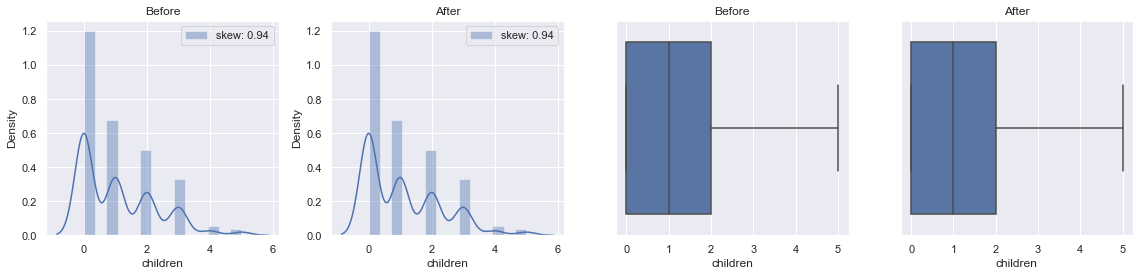

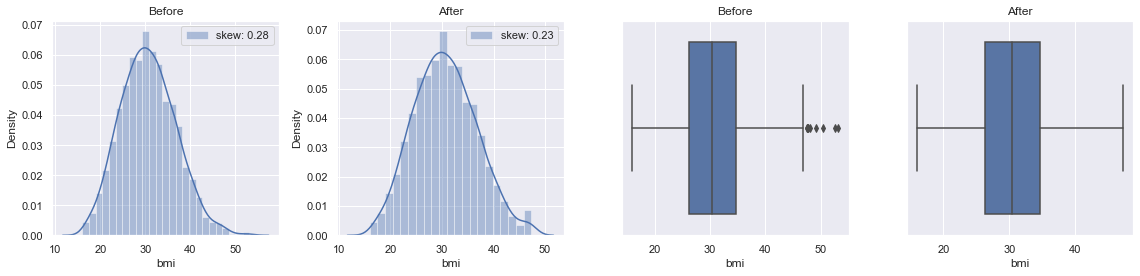

In [42]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [34]:
X=df.drop(columns='charges',axis='columns')

In [35]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [36]:
cols_scale=X[['age','bmi','children']]

In [38]:
scale=StandardScaler()

In [39]:
X_trans=scale.fit_transform(cols_scale)

In [40]:
X[['age','bmi','children']]=X_trans

In [41]:
X.shape

(1337, 8)

In [42]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,0,1,0,0,1
1,-1.511647,0.509422,-0.079442,1,0,0,1,0
2,-0.799350,0.383155,1.580143,1,0,0,1,0
3,-0.443201,-1.305052,-0.909234,1,0,1,0,0
4,-0.514431,-0.292456,-0.909234,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0.050269,1.580143,1,0,1,0,0
1334,-1.511647,0.206053,-0.909234,0,0,0,0,0
1335,-1.511647,1.014490,-0.909234,0,0,0,1,0
1336,-1.297958,-0.797524,-0.909234,0,0,0,0,1


In [43]:
y=df['charges']

In [44]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [57]:
lr=LinearRegression()

In [58]:
lrc=cross_val_score(lr,X,y,cv=10,scoring='r2',n_jobs=-1)

In [59]:
lrc

array([0.78601351, 0.73248566, 0.73492626, 0.66883399, 0.77088698,
       0.78484796, 0.79298979, 0.66646507, 0.74245742, 0.76274417])

In [60]:
lrc.mean()

0.744265081560785

In [61]:
rfr=RandomForestRegressor()

In [62]:
rfrc=cross_val_score(rfr,X,y,cv=10,scoring='r2',n_jobs=-1)

In [63]:
rfrc

array([0.86488051, 0.83870495, 0.8213402 , 0.72783847, 0.85506489,
       0.89301122, 0.8520485 , 0.78674587, 0.84235899, 0.85947172])

In [64]:
rfrc.mean()

0.8341465326394901

In [65]:
dtr=DecisionTreeRegressor()

In [66]:
dtrc=cross_val_score(dtr,X,y,cv=10,scoring='r2',n_jobs=-1)

In [67]:
dtrc

array([0.75270139, 0.66225312, 0.61213468, 0.60248145, 0.77701569,
       0.77580921, 0.72767943, 0.65795433, 0.67090878, 0.75759868])

In [68]:
dtrc.mean()

0.6996536762260296

In [69]:
svr=SVR()

In [70]:
svrc=cross_val_score(svr,X,y,cv=10,scoring='r2',n_jobs=-1)

In [71]:
svrc

array([-0.13316357, -0.09436268, -0.14545836, -0.0677052 , -0.10565926,
       -0.05651151, -0.07181197, -0.15315141, -0.11416504, -0.09773961])

In [72]:
svrc.mean()

-0.10397286080626673

In [73]:
ext=ExtraTreesRegressor()

In [74]:
extc=cross_val_score(ext,X,y,cv=10,scoring='r2',n_jobs=-1)

In [75]:
extc

array([0.85231938, 0.8039358 , 0.8037036 , 0.68395028, 0.8362538 ,
       0.86890737, 0.83608926, 0.7763193 , 0.83813841, 0.8458161 ])

In [76]:
extc.mean()

0.8145433275611491

In [77]:
xgb=XGBRegressor()

In [78]:
xgbc=cross_val_score(rfr,X,y,cv=10,scoring='r2',n_jobs=-1)

In [79]:
xgbc

array([0.86239364, 0.84427493, 0.81912869, 0.73534694, 0.85452855,
       0.89555142, 0.85241551, 0.78814281, 0.83847203, 0.8584312 ])

In [80]:
xgbc.mean()

0.8348685718316275

In [81]:
#Will Select XGBoost For Model Bulilding

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
xgr=XGBRegressor()

In [84]:
xgr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [85]:
y_train_pred=xgr.predict(X_train)

In [86]:
r2_score(y_train,y_train_pred)

0.9944346225592477

In [87]:
y_test_pred=xgr.predict(X_test)

In [88]:
r2_score(y_test,y_test_pred)

0.860766124389426

In [89]:
mean_squared_error(y_test,y_test_pred)

25585068.96338709

In [90]:
print('MAE',mean_absolute_error(y_test,y_test_pred))

MAE 2865.5683213808006


<AxesSubplot:xlabel='charges', ylabel='Density'>

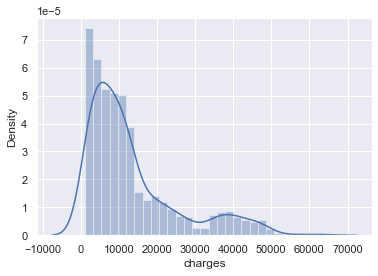

In [91]:
sns.distplot(df['charges'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

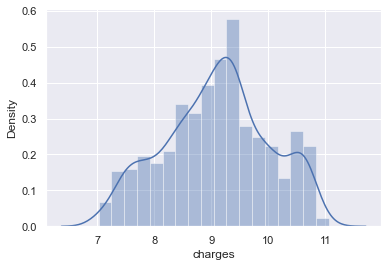

In [92]:
sns.distplot(np.log(df['charges']))

In [93]:
params={'n_estimators':[50,80,100],'max_depth':[8,10],'learning_rate':[0.01,0.3,0.6],'subsample':[0.7,0.9],'colsample_bytree':[0.7,0.9],
       'min_child_weight':[2,4],'lambda':[0.8,1.2],'alpha':[1,0.9],'eta':[0.01,0.3]}

In [133]:
xba=XGBRegressor()

In [135]:
xggs=GridSearchCV(xba,params,scoring='r2',cv=10,n_jobs=-1)

In [136]:
xggs.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'alpha': [1, 0.9], 

In [137]:
print("\n The best estimator across ALL searched params:\n",xggs.best_estimator_)
print("\n The best score across ALL searched params:\n",xggs.best_score_)
print("\n The best parameters across ALL searched params:\n",xggs.best_params_)


 The best estimator across ALL searched params:
 XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             eta=0.01, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', lambda=1.2, learning_rate=0.3,
             max_delta_step=0, max_depth=8, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=1,
             reg_lambda=1.20000005, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, ...)

 The best score across ALL searched params:
 0.8052727380584741

 The best parameters across ALL searched params:
 {'alpha': 1, 'colsample_bytree': 0.7, 'eta': 0.01, 'lambda': 1.2, 'learning_rate': 0.3, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 50, 'subsample': 0.9}
